In [111]:
import folium
from folium.plugins import HeatMap
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [113]:
df_arrests = pd.read_csv('BPD_Part_1_Victim_Based_Crime_Data.csv')
df_arrests

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,01/01/2012,00:00:00,6J,1400 JOH AVE,LARCENY,I,NaN,832.0,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1
276525,01/01/2012,00:00:00,6J,5500 SINCLAIR LN,LARCENY,O,NaN,444.0,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1
276526,01/01/2012,00:00:00,6E,400 N PATTERSON PK AV,LARCENY,O,NaN,321.0,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1
276527,01/01/2012,00:00:00,5A,5800 LILLYAN AV,BURGLARY,I,NaN,425.0,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1


In [114]:
df_arrests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276529 entries, 0 to 276528
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        276529 non-null  object 
 1   CrimeTime        276529 non-null  object 
 2   CrimeCode        276529 non-null  object 
 3   Location         274322 non-null  object 
 4   Description      276529 non-null  object 
 5   Inside/Outside   266250 non-null  object 
 6   Weapon           95577 non-null   object 
 7   Post             276305 non-null  float64
 8   District         276449 non-null  object 
 9   Neighborhood     273789 non-null  object 
 10  Longitude        274325 non-null  float64
 11  Latitude         274325 non-null  float64
 12  Location 1       274325 non-null  object 
 13  Premise          265772 non-null  object 
 14  Total Incidents  276529 non-null  int64  
dtypes: float64(3), int64(1), object(11)
memory usage: 31.6+ MB


In [116]:
df_arrests.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

# Change columns to lowercase

In [117]:
df_arrests.columns = [columns.lower().replace(' ', '_') for columns in df_arrests.columns]  
df_arrests.columns

Index(['crimedate', 'crimetime', 'crimecode', 'location', 'description',
       'inside/outside', 'weapon', 'post', 'district', 'neighborhood',
       'longitude', 'latitude', 'location_1', 'premise', 'total_incidents'],
      dtype='object')

# Missing data

In [119]:
missing_data = (df_arrests.isnull().sum())
print(missing_data[missing_data > 0])

location            2207
inside/outside     10279
weapon            180952
post                 224
district              80
neighborhood        2740
longitude           2204
latitude            2204
location_1          2204
premise            10757
dtype: int64


In [120]:
(df_arrests.count()/len(df_arrests))*100

crimedate          100.000000
crimetime          100.000000
crimecode          100.000000
location            99.201892
description        100.000000
inside/outside      96.282849
weapon              34.563102
post                99.918996
district            99.971070
neighborhood        99.009146
longitude           99.202977
latitude            99.202977
location_1          99.202977
premise             96.109992
total_incidents    100.000000
dtype: float64

# Let's describe the data

In [121]:
def df_values(df_arrests):
    for i in range(0, len(df_arrests.columns)):
        print('----------', df_arrests.columns[i], '---------')
        print (df_arrests.iloc[:,i].value_counts())
        print ('----------', df_arrests.columns[i], '---------- \n')
df_values(df_arrests)    

---------- crimedate ---------
04/27/2015    419
06/05/2016    255
09/24/2016    194
01/20/2017    194
12/20/2013    192
             ... 
03/03/2014     60
03/05/2015     54
02/13/2014     46
01/24/2016     46
01/23/2016     33
Name: crimedate, Length: 2072, dtype: int64
---------- crimedate ---------- 

---------- crimetime ---------
18:00:00    6761
17:00:00    6495
16:00:00    6067
12:00:00    5890
20:00:00    5844
            ... 
23:13:57       1
21:57:14       1
12:44:03       1
00:18:20       1
13:22:49       1
Name: crimetime, Length: 3017, dtype: int64
---------- crimetime ---------- 

---------- crimecode ---------
4E     45518
6D     36295
5A     25699
7A     25230
6G     15920
       ...  
3N         5
8CV        4
8DO        2
3LK        2
6K         1
Name: crimecode, Length: 81, dtype: int64
---------- crimecode ---------- 

---------- location ---------
200 E PRATT ST       654
300 LIGHT ST         567
1500 RUSSELL ST      556
3500 BOSTON ST       405
1200 W PRATT ST  

In [125]:
df_arrests['crimedate'].value_counts()

04/27/2015    419
06/05/2016    255
09/24/2016    194
01/20/2017    194
12/20/2013    192
             ... 
03/03/2014     60
03/05/2015     54
02/13/2014     46
01/24/2016     46
01/23/2016     33
Name: crimedate, Length: 2072, dtype: int64

# Median Crimes per day

In [124]:
df_arrests['crimedate'].value_counts().median()

134.0

# Top 5 Crimes Dates

In [127]:
df_arrests['crimedate'].value_counts().head()

04/27/2015    419
06/05/2016    255
09/24/2016    194
01/20/2017    194
12/20/2013    192
Name: crimedate, dtype: int64

# Bottom 5 Crimes Dates

In [126]:
df_arrests['crimedate'].value_counts().tail()

03/03/2014    60
03/05/2015    54
02/13/2014    46
01/24/2016    46
01/23/2016    33
Name: crimedate, dtype: int64

# What happened on 04/27/2015? 
# There was a Riot on that day!
# https://baltimore.cbslocal.com/2015/04/27/umb-closes-early-due-to-potential-rallies-threats-in-baltimore/

<AxesSubplot:>

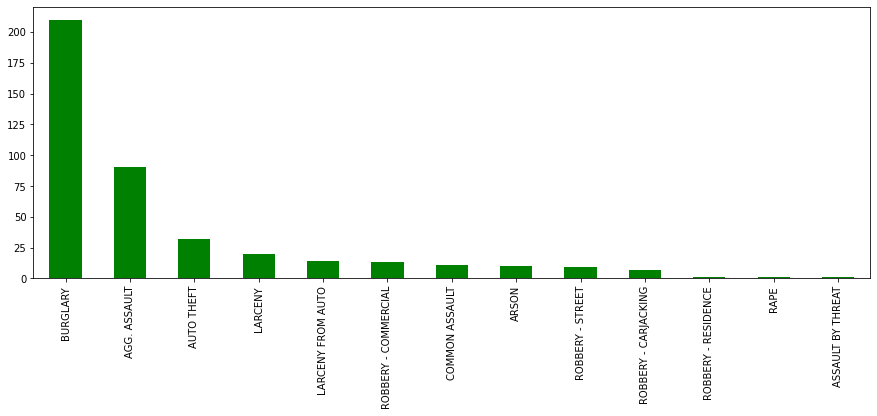

In [138]:
df_arrests_riot = df_arrests['crimedate'] == '04/27/2015'
df_arrests.loc[df_arrests_riot]['description'].value_counts().plot.bar(figsize=(15, 5), color = 'green')


# What are the most common Crimes in Baltimore on normal days?

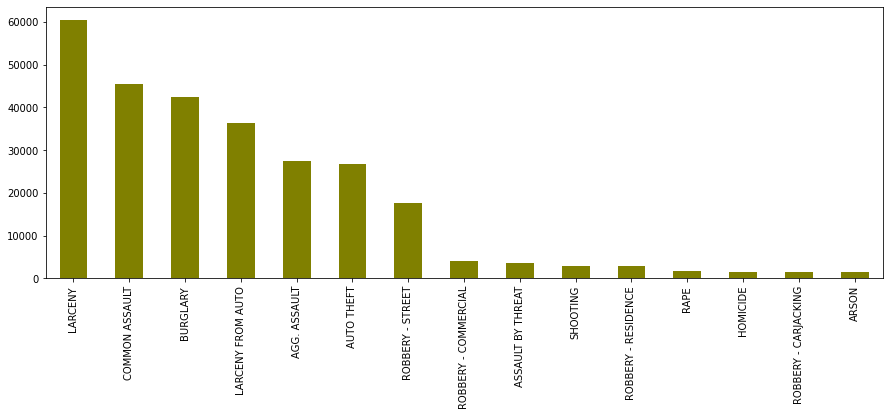

In [140]:
df_arrests_crime_number = df_arrests['description'].value_counts().plot.bar(figsize=(15, 5), color = 'olive')

# Number of Crimes and percentage per time period

In [141]:
crime_numbers = df_arrests['description'].value_counts()
crime_percent = df_arrests['description'].value_counts(1) * 100
pd.DataFrame({'crimes': crime_numbers, 'percent' : crime_percent}).round(2)

,crimes,percent
LARCENY,60528,21.89
COMMON ASSAULT,45518,16.46
BURGLARY,42538,15.38
LARCENY FROM AUTO,36295,13.13
AGG. ASSAULT,27513,9.95
AUTO THEFT,26838,9.71
ROBBERY - STREET,17691,6.40
ROBBERY - COMMERCIAL,4141,1.50
ASSAULT BY THREAT,3503,1.27
SHOOTING,2910,1.05


# Let's plot this in a pie plot

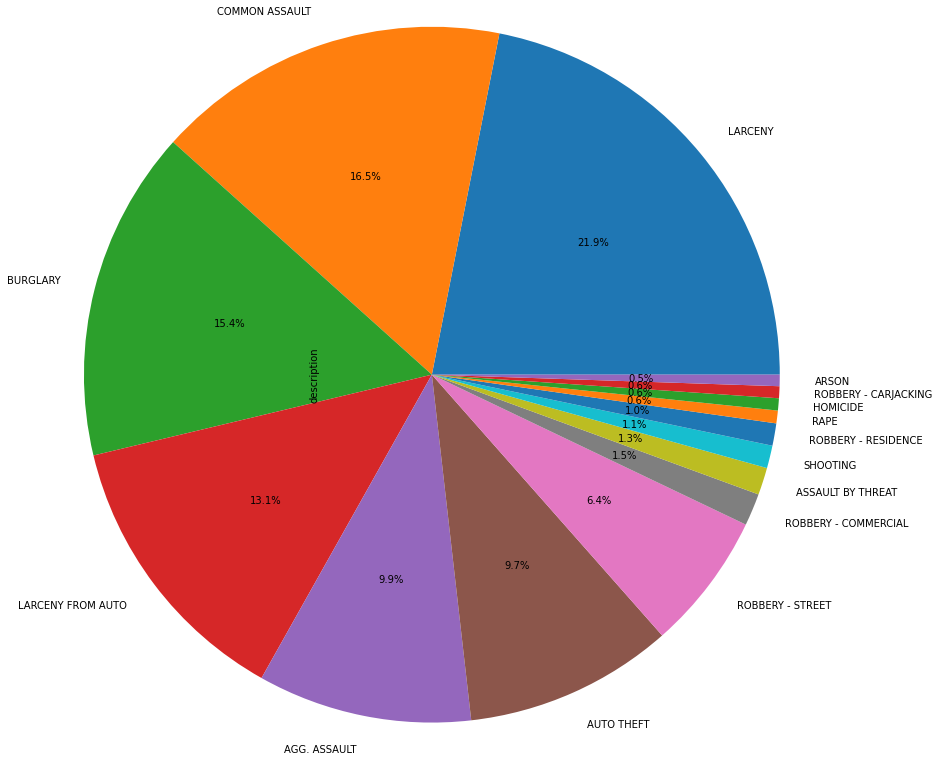

In [145]:
plt.rcParams.update({'font.size': 10})
crime_numbers_pie = df_arrests['description'].value_counts().head(15).plot.pie(radius=4, autopct='%1.1f%%', textprops=dict(color="black"))

# What weekdays have the most crime?

<AxesSubplot:>

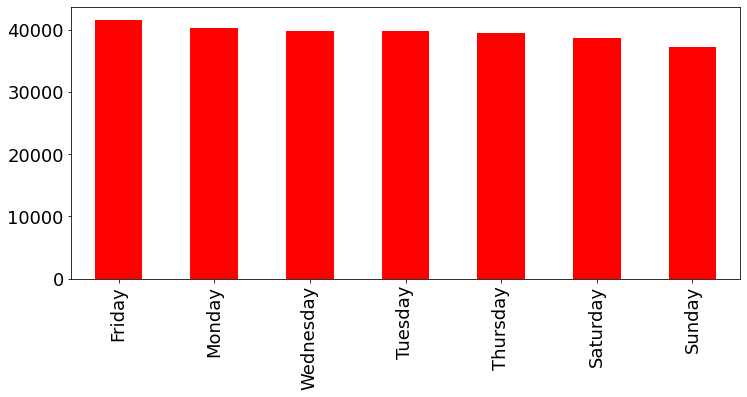

In [148]:
plt.rcParams.update({'font.size': 18})

# change date format
df_arrests['crimedate'] = pd.to_datetime(df_arrests['crimedate'], format='%m/%d/%Y')

# day of week and column creation
df_arrests['dayofweek'] = df_arrests['crimedate'].dt.day_name()

# What part of the week is most dangerous?
df_arrests['dayofweek'].value_counts().plot.bar(figsize=(12, 5), color = 'red')

# Which neighborhoods have the highest homicide rates?

<AxesSubplot:>

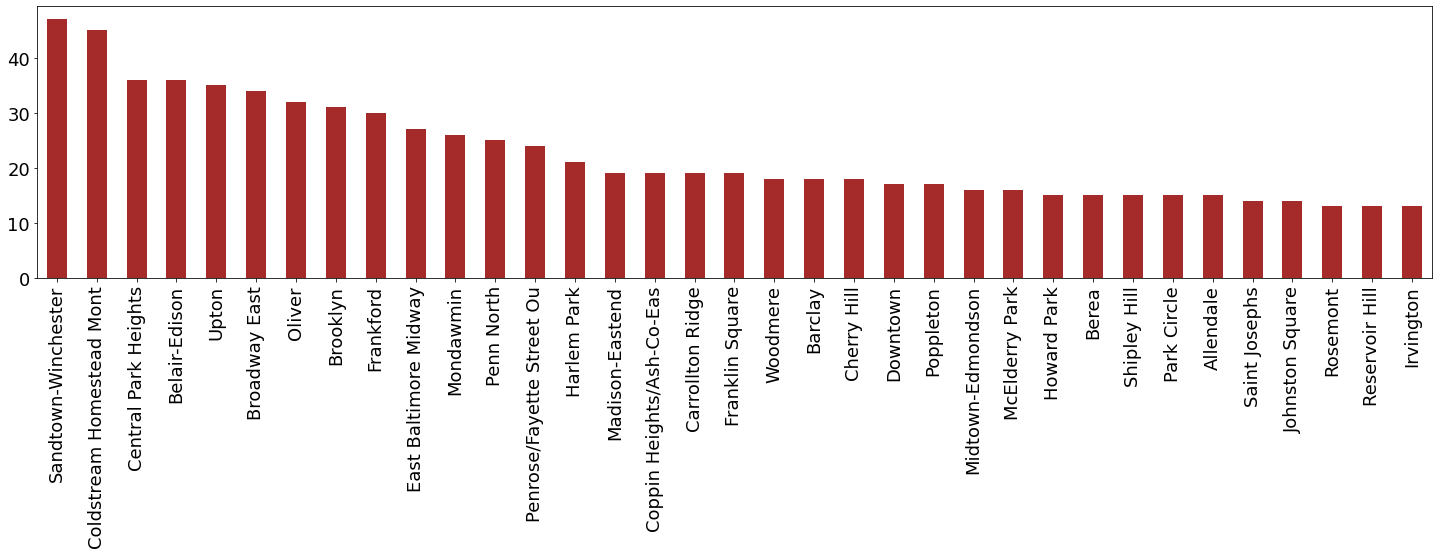

In [155]:
homicide = df_arrests['description'] == 'HOMICIDE'
df_arrests.loc[homicide]['neighborhood'].value_counts().head(35).plot.bar(figsize=(25, 5), color = 'brown')

# at which times do these Homicides occur?

In [164]:
hc_time_hours = df_arrests['description'] == 'HOMICIDE'
print("Homicide crime hours top 10")
df_arrests.loc[hc_time_hours]['crimetime'].value_counts().head(10)

Homicide crime hours top 10


23:02:00    7
01:12:00    7
02:30:00    7
15:55:00    6
21:04:00    6
16:28:00    6
21:44:00    6
22:14:00    5
22:03:00    5
21:18:00    5
Name: crimetime, dtype: int64

In [166]:
hc_time_day = df_arrests['description'] == 'HOMICIDE'
print("Homicide crimes per weekday")
df_arrests.loc[hc_time_day]['dayofweek'].value_counts().head(7)

Homicide crimes per weekday


Tuesday      241
Monday       228
Friday       228
Sunday       228
Thursday     222
Saturday     206
Wednesday    206
Name: dayofweek, dtype: int64

# which neighborhoods have the highest shooting rates?

<AxesSubplot:>

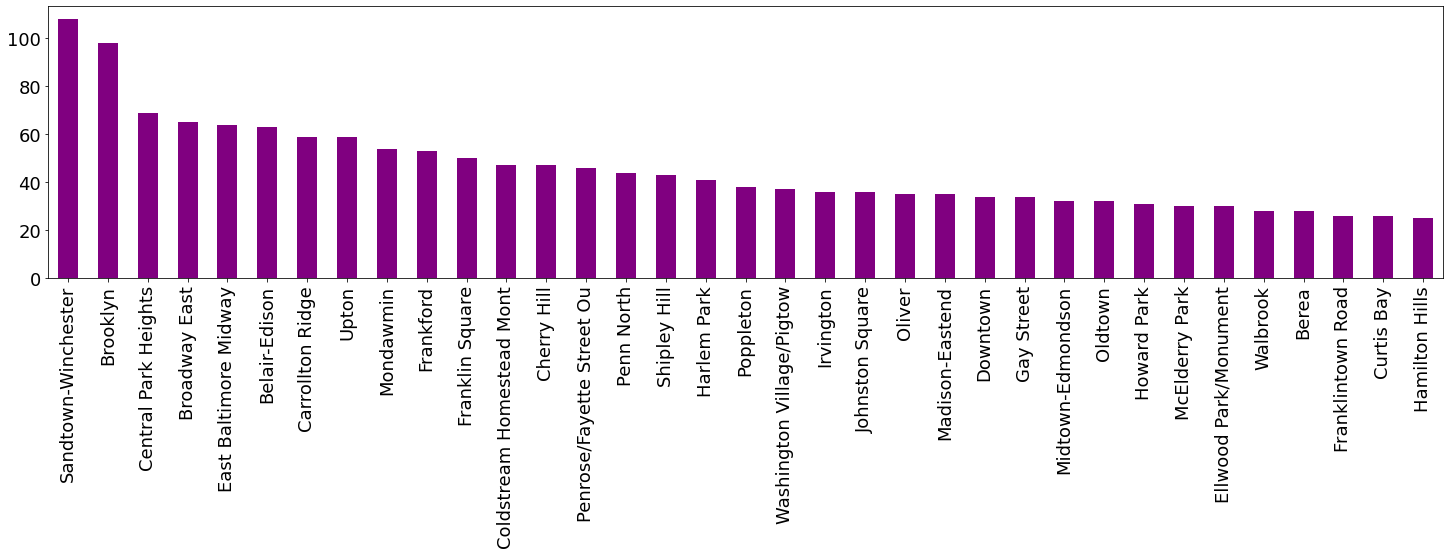

In [157]:
shooting = df_arrests['description'] == 'SHOOTING'
df_arrests.loc[shooting]['neighborhood'].value_counts().head(35).plot.bar(figsize=(25, 5), color = 'purple')

# at which times do these shootings occur?

In [168]:
sh_time_hours = df_arrests['description'] == 'SHOOTING'
print("Shooting crime hours top 10")
df_arrests.loc[sh_time_hours]['crimetime'].value_counts().head(10)

Shooting crime hours top 10


22:50:00    14
22:15:00    13
18:26:00    12
00:30:00    11
21:45:00    10
20:29:00    10
22:47:00    10
15:00:00    10
21:15:00    10
18:35:00    10
Name: crimetime, dtype: int64

In [170]:
sh_time_day = df_arrests['description'] == 'SHOOTING'
print("Shooting crimes per weekday")
df_arrests.loc[sh_time_day]['dayofweek'].value_counts().head(7)

Shooting crimes per weekday


Sunday       456
Saturday     450
Monday       449
Wednesday    428
Tuesday      395
Friday       375
Thursday     357
Name: dayofweek, dtype: int64

# Let's make a Heatmap with the Crimes

In [172]:
# first drop nulls
df_arrests = df_arrests[pd.notnull(df_arrests['latitude'])]
df_arrests = df_arrests[pd.notnull(df_arrests['longitude'])]

In [174]:
df_arrests

,crimedate,crimetime,crimecode,location,description,inside/outside,weapon,post,district,neighborhood,longitude,latitude,location_1,premise,total_incidents,dayofweek
0,2017-09-02,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,Saturday
1,2017-09-02,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,Saturday
2,2017-09-02,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1,Saturday
3,2017-09-02,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,Saturday
4,2017-09-02,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,2012-01-01,00:00:00,6J,1400 JOH AVE,LARCENY,I,NaN,832.0,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1,Sunday
276525,2012-01-01,00:00:00,6J,5500 SINCLAIR LN,LARCENY,O,NaN,444.0,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1,Sunday
276526,2012-01-01,00:00:00,6E,400 N PATTERSON PK AV,LARCENY,O,NaN,321.0,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1,Sunday
276527,2012-01-01,00:00:00,5A,5800 LILLYAN AV,BURGLARY,I,NaN,425.0,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1,Sunday


In [179]:
# zoom on map to load faster
zoom = folium.Map(location=[39.3121, -76.6198], zoom_start=13)
#zoom

# Homicide Heatmap

In [180]:
df_arrests['latitude'] = df_arrests['latitude'].astype(float)
df_arrests['longitude'] = df_arrests['longitude'].astype(float)

heat_df = df_arrests[df_arrests['description']=='HOMICIDE'] # Reducing data size

# List comprehension 
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]
# Plot it
HeatMap(heat_data).add_to(zoom)
# Display map
zoom

# Shooting Heatmap

In [184]:
df_arrests['latitude'] = df_arrests['latitude'].astype(float)
df_arrests['longitude'] = df_arrests['longitude'].astype(float)

heat_df = df_arrests[df_arrests['description']=='SHOOTING'] # Reducing data size

# List comprehension 
heat_data = [[row['latitude'],row['longitude']] for index, row in heat_df.iterrows()]
# Plot it
HeatMap(heat_data).add_to(zoom)
# Display map
zoom

# Days with highest Crimes

<AxesSubplot:xlabel='crimedate'>

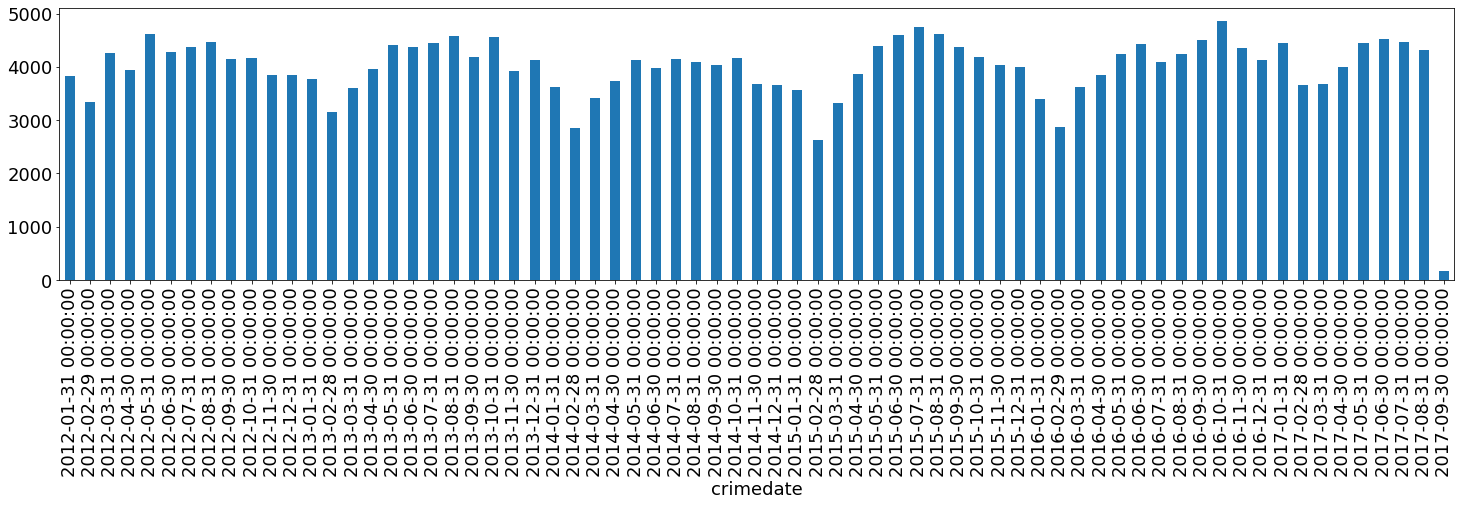

In [183]:
df_arrests.groupby(
  pd.Grouper(
    key='crimedate',
    freq='m'
  )
).size().plot.bar(figsize=(25, 5))

# Looks like January and February of each year has lower crimes. Perhaps it is because of the holidays and winter. 